In [1]:
from pyspark import SparkContext          
from pyspark.streaming import StreamingContext
from pyspark.sql import SQLContext
from pyspark.sql.functions import desc

In [2]:
sc = SparkContext()

In [3]:
ssc = StreamingContext(sc, 10) # we create a RDD every 10 seconds
sqlContext = SQLContext(sc)

In [4]:
socket_stream = ssc.socketTextStream("localhost", 5555)
# we learn port number which we listen by working TweetRead.py in command line. must look the line of scc.start() for details.
# write tweet app info to TweetRead.py

In [5]:
lines = socket_stream.window(20) # we fill the RDD every 20 seconds again

In [6]:
from collections import namedtuple
fields = ("tag", "count")
Tweet = namedtuple('Tweet', fields)

In [7]:
( lines.flatMap(lambda text: text.split(" "))
 .filter(lambda words: words.lower().startswith("#"))
 .map(lambda words: (words.lower(), 1))
 .reduceByKey(lambda a, b: a+b)
 .map(lambda rec: Tweet(rec[0], rec[1]))
 .foreachRDD(lambda rdd: rdd.toDF().sort(desc("count"))
             .limit(10).registerTempTable("tweets"))
)

# we select only words starting with '#' from tweets

In [8]:
sqlContext

In [9]:
ssc.start() 
# Before we don't work this line, we must learn by working TweetRead.py(python TweetRead.py) in command line.
# TweetRead.py bring tweets to us aboout 'belgium' which is defined in the TweetRead.py

#### For Visualization

In [10]:
import time
from IPython import display
%matplotlib inline
import seaborn as sns
import pandas
import matplotlib.pyplot as plt
from datetime import date

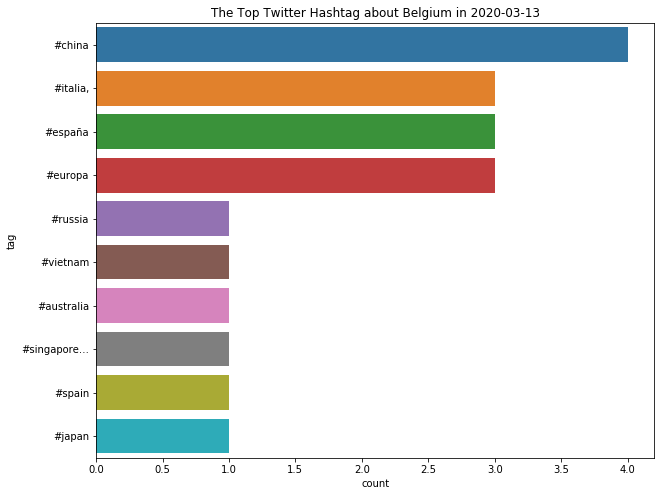

In [ ]:
today = date.today()
count = 0
while count < 10:
    time.sleep(3)
    top_10_tweets = sqlContext.sql("Select tag, count from tweets")
    top_10_df = top_10_tweets.toPandas()
    display.clear_output(wait=True)
    plt.figure(figsize = (10, 8))
    sns.barplot(x="count", y="tag", data=top_10_df)
    plt.title('The Top Twitter Hashtag about Belgium in '+ str(today))
    plt.show()
    count = count + 1

In [ ]:
ssc.stop()